## Loading the dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../Datasets/final_dataset_v6.csv')
data.info()

C:\Users\Priyasu\AppData\Local\Temp\ipykernel_19668\594559002.py:1: DtypeWarning: Columns (0,1,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Datasets/final_dataset_v6.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134203 entries, 0 to 134202
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       134203 non-null  object 
 1   majority_target          134202 non-null  object 
 2   heading                  134202 non-null  object 
 3   author                   134202 non-null  object 
 4   tweet                    134202 non-null  object 
 5   followers_count          134198 non-null  float64
 6   friends_count            134198 non-null  float64
 7   favourites_count         134198 non-null  float64
 8   statuses_count           134198 non-null  float64
 9   listed_count             134198 non-null  float64
 10  mentions                 134198 non-null  float64
 11  quotes                   134198 non-null  float64
 12  replies                  134198 non-null  object 
 13  retweets                 134198 non-null  object 
 14  favo

## Preprocessing for training

In [3]:
import re

In [4]:
data1 = data.dropna()
del data1['id']
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134194 entries, 0 to 134202
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   majority_target          134194 non-null  object 
 1   heading                  134194 non-null  object 
 2   author                   134194 non-null  object 
 3   tweet                    134194 non-null  object 
 4   followers_count          134194 non-null  float64
 5   friends_count            134194 non-null  float64
 6   favourites_count         134194 non-null  float64
 7   statuses_count           134194 non-null  float64
 8   listed_count             134194 non-null  float64
 9   mentions                 134194 non-null  float64
 10  quotes                   134194 non-null  float64
 11  replies                  134194 non-null  object 
 12  retweets                 134194 non-null  object 
 13  favourites               134194 non-null  object 
 14  hash

In [5]:
# Preprocessing functions
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@[^\s]+|#[^\s]+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    return text

In [6]:
# Apply preprocessing to the tweet column
data1['clean_tweet'] = data1['tweet'].apply(preprocess_text)

C:\Users\Priyasu\AppData\Local\Temp\ipykernel_19668\1795418931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['clean_tweet'] = data1['tweet'].apply(preprocess_text)


In [7]:
data1['5_label_majority_answer'].unique()

array(['Mostly Agree', 'NO MAJORITY', 'Agree', 'Mostly Disagree',
       'Disagree'], dtype=object)

In [8]:
# Mapping text labels to numerical categories
label_mapping = {
    'Mostly Agree': 0,
    'Agree': 1,
    'Disagree': 2,
    'Mostly Disagree': 3,
    'NO MAJORITY': 4
}

# Applying mapping to the DataFrame column
data1['5_label_numerical'] = data1['5_label_majority_answer'].map(label_mapping)

C:\Users\Priyasu\AppData\Local\Temp\ipykernel_19668\14650081.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['5_label_numerical'] = data1['5_label_majority_answer'].map(label_mapping)


In [9]:
data1['majority_target'].unique()

array(['TRUE', 'FALSE', False, True], dtype=object)

In [10]:
# Convert 'majority_target' column to numeric (if it's boolean)
label_binary_mapping = {
    'TRUE': 0,
    'True': 0,
    'true': 0,
    'FALSE': 1,
    'False': 1,
    'false': 1
}
data1['majority_target'] = data1['majority_target'].replace(label_binary_mapping).astype(int)

C:\Users\Priyasu\AppData\Local\Temp\ipykernel_19668\2759310591.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['majority_target'] = data1['majority_target'].replace(label_binary_mapping).astype(int)


In [11]:
data1['majority_target'].unique()

array([0, 1])

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134194 entries, 0 to 134202
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   majority_target          134194 non-null  int32  
 1   heading                  134194 non-null  object 
 2   author                   134194 non-null  object 
 3   tweet                    134194 non-null  object 
 4   followers_count          134194 non-null  float64
 5   friends_count            134194 non-null  float64
 6   favourites_count         134194 non-null  float64
 7   statuses_count           134194 non-null  float64
 8   listed_count             134194 non-null  float64
 9   mentions                 134194 non-null  float64
 10  quotes                   134194 non-null  float64
 11  replies                  134194 non-null  object 
 12  retweets                 134194 non-null  object 
 13  favourites               134194 non-null  object 
 14  hash

## Train Test Split

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Sepratating & assigning features and target columns to X & y
y = data1['majority_target']
X_other_features = data1[['Exclusivity','BotScore', 'cred_score', '5_label_numerical']]
X_text = data1['clean_tweet']
X_other_features.shape, y.shape

((134194, 4), (134194,))

In [15]:
# Split the data into training and testing sets
X_text_train, X_text_test, X_other_train, X_other_test, y_train, y_test = train_test_split(
    X_text, X_other_features, y, test_size=0.2, random_state=42
)

In [16]:
# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train.astype(str))
X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test.astype(str))

In [39]:
# Download TDIDF vectorizer
import pickle
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

In [17]:
# Combine text features with other numerical features
import scipy.sparse as sp
X_train = sp.hstack((X_text_train_tfidf, X_other_train.values.astype(float)), format='csr')
X_test = sp.hstack((X_text_test_tfidf, X_other_test.values.astype(float)), format='csr')

# ML Models

In [19]:
# Creating holders to store the model performance results
ML_Model = []
acc_test = []
pre_test = []
recall_test = []
f1_test = []
auc_test = []

#function to call for storing the results
def storeResults(model, a1, p1, r1, f1, auc):
  ML_Model.append(model)
  acc_test.append(round(a1, 3))
  pre_test.append(round(p1, 3))
  recall_test.append(round(r1, 3))
  f1_test.append(round(f1, 3))
  auc_test.append(round(auc, 3))

## Logistic Regression

In [20]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Make predictions
y_pred = logistic_model.predict(X_test)

y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
acc_test_lr = accuracy_score(y_test, y_pred)
pre_test_lr = precision_score(y_test, y_pred)
re_test_lr = recall_score(y_test, y_pred)
f1_test_lr = f1_score(y_test, y_pred)
roc_auc_test_lr = roc_auc_score(y_test, y_pred_prob)

print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print("Logistic Regression: Precision on test Data: {:.3f}".format(pre_test_lr))
print("Logistic Regression: Recall on test Data: {:.3f}".format(re_test_lr))
print("Logistic Regression: F1 on test Data: {:.3f}".format(f1_test_lr))
print("Logistic Regression: AUC on test Data: {:.3f}".format(roc_auc_test_lr))

Logistic Regression: Accuracy on test Data: 0.897
Logistic Regression: Precision on test Data: 0.860
Logistic Regression: Recall on test Data: 0.681
Logistic Regression: F1 on test Data: 0.760
Logistic Regression: AUC on test Data: 0.913


In [22]:
storeResults("Logistic Regression", acc_test_lr, pre_test_lr, re_test_lr, f1_test_lr, roc_auc_test_lr)

In [23]:
# Store predicted values in dataframe
Test_Predicted = pd.DataFrame(y_pred, columns = ['LR_Predicted_Values'])

## Random Forest

In [24]:
# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
# Make predictions
y_pred_rf = rf.predict(X_test)

y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate the model
acc_test_rf = accuracy_score(y_test, y_pred_rf)
pre_test_rf = precision_score(y_test, y_pred_rf)
re_test_rf = recall_score(y_test, y_pred_rf)
f1_test_rf = f1_score(y_test, y_pred_rf)
roc_auc_test_rf = roc_auc_score(y_test, y_pred_prob_rf)

print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_rf))
print("Random Forest: Precision on test Data: {:.3f}".format(pre_test_rf))
print("Random Forest: Recall on test Data: {:.3f}".format(re_test_rf))
print("Random Forest: F1 on test Data: {:.3f}".format(f1_test_rf))
print("Random Forest: AUC on test Data: {:.3f}".format(roc_auc_test_rf))

Random Forest: Accuracy on test Data: 0.944
Random Forest: Precision on test Data: 0.931
Random Forest: Recall on test Data: 0.826
Random Forest: F1 on test Data: 0.876
Random Forest: AUC on test Data: 0.972


In [26]:
storeResults("Random Forest", acc_test_rf, pre_test_rf, re_test_rf, f1_test_rf, roc_auc_test_rf)

In [27]:
Test_Predicted["RF_Predicted_Values"] = y_pred_rf

## SVM

In [28]:
# Train SVM
svm = SVC()
svm.fit(X_train, y_train)

In [ ]:
# Make predictions using the SVM model
y_pred_svm = svm.predict(X_test)

y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
acc_test_svm = accuracy_score(y_test, y_pred_svm)
pre_test_svm = precision_score(y_test, y_pred_svm)
re_test_svm = recall_score(y_test, y_pred_svm)
f1_test_svm = f1_score(y_test, y_pred_svm)
roc_auc_test_svm = roc_auc_score(y_test, y_pred_prob_svm)

print("SVM: Accuracy on test Data: {:.3f}".format(acc_test_svm))
print("SVM: Precision on test Data: {:.3f}".format(pre_test_svm))
print("SVM: Recall on test Data: {:.3f}".format(re_test_svm))
print("SVM: F1 on test Data: {:.3f}".format(f1_test_svm))
print("SVM: AUC on test Data: {:.3f}".format(roc_auc_test_svm))

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [ ]:
storeResults("SVM", acc_test_svm, pre_test_svm, re_test_svm, f1_test_svm, roc_auc_test_svm)

In [ ]:
Test_Predicted["SVM_Predicted_Values"] = y_pred_svm

## XGBoost

In [20]:
# Initialize XGBoost classifier
xgb = XGBClassifier()

# Train the XGBoost model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
# Make predictions using the XGBoost model
y_pred_xgb = xgb.predict(X_test)

y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate the XGBoost model
acc_test_xgb = accuracy_score(y_test, y_pred_xgb)
pre_test_xgb = precision_score(y_test, y_pred_xgb)
re_test_xgb = recall_score(y_test, y_pred_xgb)
f1_test_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_test_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

print("XGBoost: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print("XGBoost: Precision on test Data: {:.3f}".format(pre_test_xgb))
print("XGBoost: Recall on test Data: {:.3f}".format(re_test_xgb))
print("XGBoost: F1 on test Data: {:.3f}".format(f1_test_xgb))
print("XGBoost: AUC on test Data: {:.3f}".format(roc_auc_test_xgb))

XGBoost: Accuracy on test Data: 0.947
XGBoost: Precision on test Data: 0.941
XGBoost: Recall on test Data: 0.831
XGBoost: F1 on test Data: 0.882
XGBoost: AUC on test Data: 0.972


XGBoost: Accuracy on test Data: 0.947
XGBoost: Precision on test Data: 0.941
XGBoost: Recall on test Data: 0.831
XGBoost: F1 on test Data: 0.882
XGBoost: AUC on test Data: 0.972


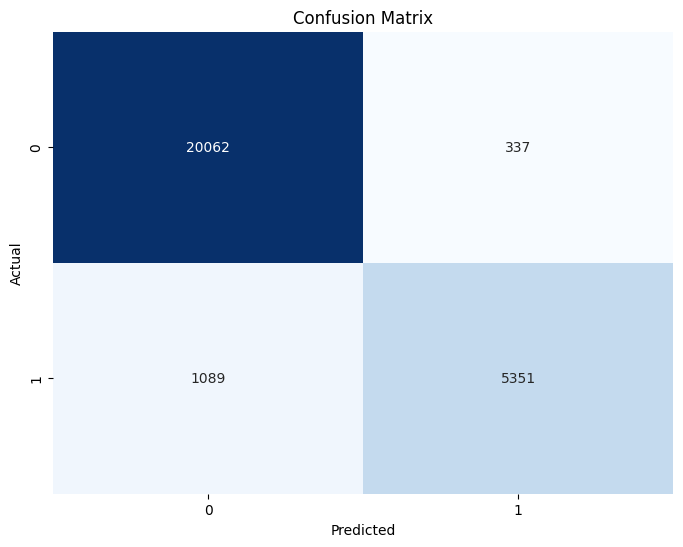

In [23]:
# Make predictions using the XGBoost model
y_pred_xgb = xgb.predict(X_test)

# Predict probabilities
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate the XGBoost model
acc_test_xgb = accuracy_score(y_test, y_pred_xgb)
pre_test_xgb = precision_score(y_test, y_pred_xgb)
re_test_xgb = recall_score(y_test, y_pred_xgb)
f1_test_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_test_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

# Print evaluation metrics
print("XGBoost: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print("XGBoost: Precision on test Data: {:.3f}".format(pre_test_xgb))
print("XGBoost: Recall on test Data: {:.3f}".format(re_test_xgb))
print("XGBoost: F1 on test Data: {:.3f}".format(f1_test_xgb))
print("XGBoost: AUC on test Data: {:.3f}".format(roc_auc_test_xgb))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
storeResults("XGBoost", acc_test_xgb, pre_test_xgb, re_test_xgb, f1_test_xgb, roc_auc_test_xgb)

In [31]:
Test_Predicted["XGBoost_Predicted Values"] = y_pred_xgb

Export

In [34]:
Test_Predicted.to_csv("predictions_v1.csv", index=False)
# from google.colab import files
# files.download('../Datasets/predictions_v1.csv')

# Code to download the CSV file in a local Jupyter notebook environment
from IPython.display import FileLink

# Display a link to download the CSV file
display(FileLink("predictions_v1.csv"))

d:\Final Year project\Multimodal-FND-on-Twitter\Notebooks\predictions_v1.csv

## BERT

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split

In [ ]:
X_bert = data1[['Exclusivity','BotScore', 'cred_score', '5_label_numerical', 'clean_tweet']]
y_bert = data1['majority_target']

In [ ]:
# Split dataset into train and test sets
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert, y_bert, test_size=0.2, random_state=42)

In [ ]:
X_train_bert['clean_tweet']

48732     currently  the top 10   mostly 1   hold 70   ...
61548       can you explain this  the black voter turno...
25766      warren buffets claim is misleading  he ignor...
5880      breaking into his core 40  base he has always...
74767     while djt continues 2 live rent free inside y...
                               ...                        
6265     philadelphia breaks three decade record of mur...
54890    i havent seen any more protest video footage o...
76824    did you know  the eisenhower interstate system...
860        no  trump administration literally signed a ...
15795     i picture  supporters loading up their golf c...
Name: clean_tweet, Length: 61810, dtype: object

In [ ]:
# Tokenize the input text data for train and test sets
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenized_train_texts = tokenizer(X_train_bert['clean_tweet'].tolist(), padding=True, truncation=True, return_tensors='tf')
tokenized_test_texts = tokenizer(X_test_bert['clean_tweet'].tolist(), padding=True, truncation=True, return_tensors='tf')

In [ ]:
print(tokenized_train_texts)

{'input_ids': <tf.Tensor: shape=(61810, 85), dtype=int32, numpy=
array([[  101,  2747,  1996, ...,     0,     0,     0],
       [  101,  2064,  2017, ...,     0,     0,     0],
       [  101,  6031, 28305, ...,     0,     0,     0],
       ...,
       [  101,  2106,  2017, ...,     0,     0,     0],
       [  101,  2053,  8398, ...,     0,     0,     0],
       [  101,  1045,  3861, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(61810, 85), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(61810, 85), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=in

In [ ]:
# Define additional numerical features separately
X_train_additional = {
    'Exclusivity': X_train_bert['Exclusivity'].values,
    'BotScore': X_train_bert['BotScore'].values,
    'cred_score': X_train_bert['cred_score'].values,
    '5_label_numerical': X_train_bert['5_label_numerical'].values
}

X_test_additional = {
    'Exclusivity': X_test_bert['Exclusivity'].values,
    'BotScore': X_test_bert['BotScore'].values,
    'cred_score': X_test_bert['cred_score'].values,
    '5_label_numerical': X_test_bert['5_label_numerical'].values
}

In [ ]:
# Convert numerical features to TensorFlow tensors
for key in X_train_additional:
    X_train_additional[key] = tf.convert_to_tensor(X_train_additional[key], dtype=tf.float32)
    X_test_additional[key] = tf.convert_to_tensor(X_test_additional[key], dtype=tf.float32)

In [ ]:
batch_size = 32

# Create TensorFlow Datasets for text data only
train_dataset_text = tf.data.Dataset.from_tensor_slices((dict(tokenized_train_texts), y_train_bert)).shuffle(buffer_size=100).batch(batch_size)
test_dataset_text = tf.data.Dataset.from_tensor_slices((dict(tokenized_test_texts), y_test_bert)).batch(batch_size)

In [ ]:
print(train_dataset_text)

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 85), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, 85), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 85), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
# Combine text data and additional features
train_dataset_additional = tf.data.Dataset.from_tensor_slices(X_train_additional)
test_dataset_additional = tf.data.Dataset.from_tensor_slices(X_test_additional)

In [ ]:
# Combine text data and additional features for train and test datasets
train_dataset = tf.data.Dataset.zip((train_dataset_text, train_dataset_additional)).map(lambda x, y: ({**x[0], **y}, x[1]))
test_dataset = tf.data.Dataset.zip((test_dataset_text, test_dataset_additional)).map(lambda x, y: ({**x[0], **y}, x[1]))

In [ ]:
# Load pre-trained BERT model for sequence classification
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define additional input layers for numerical features
exclusivity_input = tf.keras.Input(shape=(1,), name='Exclusivity')
bot_score_input = tf.keras.Input(shape=(1,), name='BotScore')
cred_score_input = tf.keras.Input(shape=(1,), name='cred_score')
label_numerical_input = tf.keras.Input(shape=(1,), name='5_label_numerical')

In [ ]:
# Combine BERT output with numerical features
bert_output = bert_model([tf.keras.Input(shape=(None,), dtype=tf.int32, name='input_ids'),
                          tf.keras.Input(shape=(None,), dtype=tf.int32, name='attention_mask')])[0]

In [ ]:
print(bert_output)

KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='tf_bert_for_sequence_classification_4/classifier/BiasAdd:0', description="created by layer 'tf_bert_for_sequence_classification_4'")


In [ ]:
# # Get BERT output
# bert_output = bert_model({'input_ids': tf.keras.Input(shape=(), dtype=tf.int32, name='input_ids'),
#                           'attention_mask': tf.keras.Input(shape=(), dtype=tf.int32, name='attention_mask')})[0]

ValueError: ignored

In [ ]:
# # Concatenate numerical features
# concatenated_features = tf.keras.layers.Concatenate()([exclusivity_input, bot_score_input, cred_score_input, label_numerical_input])

# # Define a dense layer for numerical features
# numerical_features = tf.keras.layers.Dense(16, activation='relu')(concatenated_features)

In [ ]:
# Combine BERT output with numerical features
concatenated_features = tf.keras.layers.Concatenate()([bert_output, exclusivity_input, bot_score_input, cred_score_input, label_numerical_input])

In [ ]:
# # Add dense layers for classification
# dense = tf.keras.layers.Dense(256, activation='relu')(concatenated_features)
# output = tf.keras.layers.Dense(2, activation='softmax')(dense)

In [ ]:
output = tf.keras.layers.Dense(units=1, activation='sigmoid')(concatenated_features)

In [ ]:
# Create custom model
custom_model = tf.keras.Model(inputs={'attention_mask': tf.keras.Input(shape=(), dtype=tf.int32, name='attention_mask'),
                                      'input_ids': tf.keras.Input(shape=(), dtype=tf.int32, name='input_ids'),
                                      'exclusivity': exclusivity_input,
                                      'bot_score': bot_score_input,
                                      'cred_score': cred_score_input,
                                      '5_label_numerical': label_numerical_input},
                              outputs=output)

ValueError: ignored

In [ ]:
# Combine numerical features with text data for train and test sets
train_dataset_additional = tf.data.Dataset.from_tensor_slices(X_train_additional)
test_dataset_additional = tf.data.Dataset.from_tensor_slices(X_test_additional)

In [ ]:
print(train_dataset)

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(None, 85), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, 85), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 85), dtype=tf.int32, name=None), 'Exclusivity': TensorSpec(shape=(), dtype=tf.float32, name=None), 'BotScore': TensorSpec(shape=(), dtype=tf.float32, name=None), 'cred_score': TensorSpec(shape=(), dtype=tf.float32, name=None), '5_label_numerical': TensorSpec(shape=(), dtype=tf.float32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
# Fine-tuning the model
bert_model.fit(train_dataset, epochs=3, validation_data=test_dataset)

Epoch 1/3


TypeError: ignored

## Model Comparison

In [35]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Test Accuracy': acc_test,
    'Test Precision': pre_test,
    'Test Recall': recall_test,
    'Test F1': f1_test,
    'Test AUC': auc_test})
results

,ML Model,Test Accuracy,Test Precision,Test Recall,Test F1,Test AUC
0,Logistic Regression,0.897,0.860,0.681,0.760,0.913
1,Random Forest,0.944,0.931,0.826,0.876,0.972
2,XGBoost,0.947,0.941,0.831,0.882,0.972


In [36]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy'], ascending=False)

,ML Model,Test Accuracy,Test Precision,Test Recall,Test F1,Test AUC
2,XGBoost,0.947,0.941,0.831,0.882,0.972
1,Random Forest,0.944,0.931,0.826,0.876,0.972
0,Logistic Regression,0.897,0.860,0.681,0.760,0.913


Here XGBoost performs the best. So, lets download the model for further operations.

## Download Model

In [37]:
import joblib

# Save the XGBoost model
joblib.dump(xgb, 'xgboost_model.pkl')

# Download the XGBoost model
from IPython.display import FileLink
display(FileLink('xgboost_model.pkl'))

d:\Final Year project\Multimodal-FND-on-Twitter\Prototype\models\xgboost_model.pkl

## NLP Categorization

Types - Deepfake
Misinformation
Disinformation
Clickbait
Satire Spam

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134194 entries, 0 to 134202
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   majority_target          134194 non-null  int64  
 1   statement                134194 non-null  object 
 2   author                   134194 non-null  object 
 3   tweet                    134194 non-null  object 
 4   followers_count          134194 non-null  float64
 5   friends_count            134194 non-null  float64
 6   favourites_count         134194 non-null  float64
 7   statuses_count           134194 non-null  float64
 8   listed_count             134194 non-null  float64
 9   mentions                 134194 non-null  float64
 10  quotes                   134194 non-null  float64
 11  replies                  134194 non-null  object 
 12  retweets                 134194 non-null  object 
 13  favourites               134194 non-null  object 
 14  hash

In [ ]:
data1= data1[:5000]

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Preprocessing function
def nlp_preprocess(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    tokens = word_tokenize(text.lower())  # Tokenization and lowercase
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization

    return tokens

In [ ]:
data1['lda_clean_tweet'] = data1['clean_tweet'].apply(nlp_preprocess)

In [ ]:
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(data1['lda_clean_tweet'])

# Create a corpus: a list of bags of words (BoW)
corpus = [dictionary.doc2bow(text) for text in data1['lda_clean_tweet']]

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [ ]:
# Function to get the dominant topic for a given tweet
def get_dominant_topic(tokens):
    tweet = ' '.join(tokens)  # Join tokens to form a string
    tweet_bow = dictionary.doc2bow(nlp_preprocess(tweet))
    topics = lda_model.get_document_topics(tweet_bow)
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    return dominant_topic

In [ ]:
# Categorizing tweets based on dominant topics
topic_categories = {
    0: "Misinformation",
    1: "Disinformation",
    2: "Satire",
    3: "Spam"
    # Add more categories or topics as needed based on your identified topics
}

In [ ]:
# Create a new column 'Dominant_Topic' to store the dominant topic for each tweet
data1['Dominant_Topic'] = data1['lda_clean_tweet'].apply(get_dominant_topic)

In [ ]:
# Create an 'Assigned_Category' column to assign categories based on dominant topics
data1['Assigned_Category'] = data1['Dominant_Topic'].map(topic_categories).fillna("Uncategorized")

In [ ]:
data1.head()

,majority_target,statement,author,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,mentions,...,UAS,TAS,UAS_normalized,TAS_normalized,Exclusivity,clean_tweet,5_label_numerical,lda_clean_tweet,Dominant_Topic,Assigned_Category
0,0,End of eviction moratorium means millions of A...,D.L. Davis,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,1.0,...,6123.68,8.499,5.859357e-05,2.194089e-05,0.0,biden blunders 6 month update inflation d...,0,"[biden, blunder, month, update, inflation, del...",3,Spam
1,0,End of eviction moratorium means millions of A...,D.L. Davis,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,3.0,...,4611.58,0.800,4.412514e-05,2.065268e-06,0.0,not as many people are literally starving a...,4,"[many, people, literally, starving, street, ce...",4,Uncategorized
2,0,End of eviction moratorium means millions of A...,D.L. Davis,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,0.0,...,80.75,0.245,7.721729e-07,6.324884e-07,0.0,the supreme court is siding with super rich pr...,1,"[supreme, court, siding, super, rich, property...",3,Spam
3,0,End of eviction moratorium means millions of A...,D.L. Davis,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,1.0,...,6123.66,0.000,5.859338e-05,0.000000e+00,0.0,biden blunders broken campaign promises inf...,0,"[biden, blunder, broken, campaign, promise, in...",3,Spam
4,0,End of eviction moratorium means millions of A...,D.L. Davis,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,1.0,...,936.46,0.800,8.959981e-06,2.065268e-06,0.0,i agree the confluence of events right now i...,1,"[agree, confluence, event, right, unprecedente...",3,Spam


In [ ]:
data1['Assigned_Category'].unique()

array(['Spam', 'Uncategorized', 'Disinformation', 'Misinformation',
       'Satire'], dtype=object)